# Email Spam Detection with Machine Learning


****importing libraries


In [243]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

****loading datset

In [244]:
df=pd.read_csv('E:\spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [249]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [245]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [250]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [248]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [251]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [252]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [253]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [254]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [255]:
df['v2'].unique()


array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [256]:
df['Unnamed: 2'].nunique()

43

In [257]:
df['Unnamed: 3'].nunique()

10

In [258]:
df['Unnamed: 4'].nunique()

5

In [259]:
df.dropna()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


In [260]:
df.dropna().nunique()

v1            1
v2            5
Unnamed: 2    5
Unnamed: 3    5
Unnamed: 4    5
dtype: int64

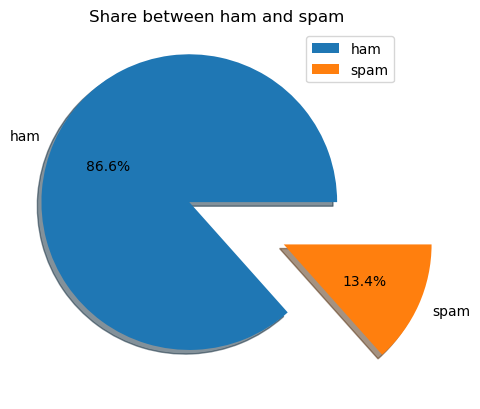

In [261]:
k=df.groupby('v1')
c1=k['v2'].count()
exp1=[0.2,0.5]
plt.pie(c1,labels=df['v1'].unique(),autopct='%1.1f%%',shadow=True,explode=exp1)
plt.title('Share between ham and spam')
plt.legend()

****since we can observe that minority of messages are spam.
>since majority of data in unnamed 2,3,4 are Nan values
we are going to drop /delete them.


In [262]:
df.drop('Unnamed: 2',axis=1,inplace=True)
del df['Unnamed: 3']
del df['Unnamed: 4']
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


****importing sklearn 

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 

In [264]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

****no Null values


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


****removing duplicate values

In [266]:
df=df.drop_duplicates()


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


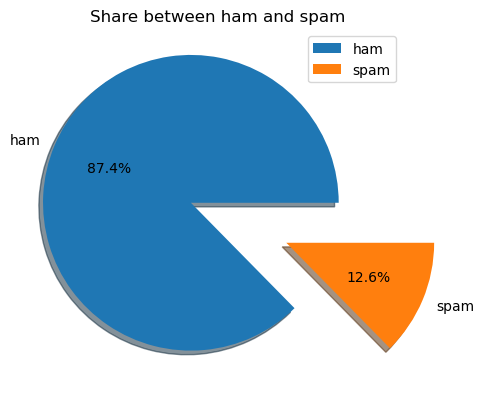

In [237]:
k1=df.groupby('v1')
k2=k1['v2'].count()
exp1=[0.2,0.5]
plt.pie(k2,labels=df['v1'].unique(),autopct='%1.1f%%',shadow=True,explode=exp1)
plt.title('Share between ham and spam')
plt.legend()

****we can observe that after removing duplicates 
>change in the ratio's of spam and ham


In [238]:
x1=df['v2']
y1=df['v1']

****here x1 is the input data
here y1 is the target data

In [274]:
print(x1_train)

2710    Hope you enjoyed your new content. text stop t...
3464    Haha figures, well I found the piece and prisc...
2051    Hey darlin.. i can pick u up at college if u t...
5567    This is the 2nd time we have tried 2 contact u...
1967    Even i cant close my eyes you are in me our va...
                              ...                        
5045    Desires- u going to doctor 4 liver. And get a ...
5014    I think the other two still need to get cash b...
4760    It's Ì© only $140 ard...Ìä rest all ard $180 a...
3600                         Jay told me already, will do
4131    Hi baby ive just got back from work and i was ...
Name: v2, Length: 3876, dtype: object


In [275]:
print(x1_test)

368                            Wat uniform? In where get?
2048                          So dont use hook up any how
571                 Do you know where my lab goggles went
1570    No:-)i got rumour that you going to buy apartm...
1186     Goodmorning, Today i am late for  &lt;#&gt; min.
                              ...                        
5078    Mark works tomorrow. He gets out at 5. His wor...
1714                             Yeah I don't see why not
496     Nope... Think i will go for it on monday... So...
4860                               Nokia phone is lovly..
4226                      Buy one egg for me da..please:)
Name: v2, Length: 1293, dtype: object


In [276]:
print(y1_train)

2710    spam
3464     ham
2051     ham
5567    spam
1967     ham
        ... 
5045     ham
5014     ham
4760     ham
3600     ham
4131     ham
Name: v1, Length: 3876, dtype: object


In [277]:
print(y1_test)

368     ham
2048    ham
571     ham
1570    ham
1186    ham
       ... 
5078    ham
1714    ham
496     ham
4860    ham
4226    ham
Name: v1, Length: 1293, dtype: object


****Machine Learning Model

In [267]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25)

In [268]:
cv = CountVectorizer()
features = cv.fit_transform(x1_train)

***SVM -Support Vector Machine Algorithm
>a linear model for classification and regression
>the algorithm creates a line, or a hyperplane, which separates the data into classes

In [269]:
model = svm.SVC()
model.fit(features,y1_train)

SVC()

In [271]:
features_test = cv.transform(x1_test)
print(" Accuracy of the model is",(model.score(features_test,y1_test))*100)

 Accuracy of the model is 97.52513534416086


****we have successfully created the machine learning model  with Accuracy of morethan 97% 


#  *hence the task is completed.